### **NOTES**


Projeto de ML, aplicação de Regressão Linear 

_Concentrar esforços no website ou app mobile?_

Parabéns! Você conseguiu um contrato de trabalho com uma empresa de e-commerce de roupas de New York, e que também realiza sessões de consultoria em estilo e vestuário na loja física. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, e então podem ir para casa e encomendar no aplicativo mobile ou no website a roupa que desejam.

A empresa quer decidir se deve concentrar seus esforços no aplicativo ou no website e contrataram você para ajudá-los a descobrir isso!

-------

### **INITIAL IMPORTS** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')


-----

### **FUNCTIONS**

---

### **CLEANING / EDA**

In [2]:
#.info()  #.head(3)  #.tail()  #.columns
#[''].unique()  #.isnull().sum()  #[''].value_counts()
# #.describe()

#dataset treino
df_train = pd.read_csv('./ecommerce-customers')
#500 entradas
#valores nulos: 0
#'24645 Valerie Unions Suite 582\r\nCobbborough, DC 99414-7564'

#Avg. Session Length: tempo médio das sessões de consultoria na loja
#Time on App: tempo médio gasto no app (min)
#Time on Website: tempo médio gasto no site (min)
#Length of Membership: tempo que o cliente é membro. (anos)
#média: 3.5 anos; menor: 0.269901 x 12 = 3meses8dias; maior: 7 anos

#Yearly Amount Spent: montante gasto por ano ($)
#média : $499.3; menor: $256.6; maior: $765.5
# USD 1 = BRL 5.29 (15/03/23)


In [ ]:
#df_train.info()
#df_train.head()


In [3]:
#boa prática:
#df_train, df_test  -> ficam somente p/ consulta
#alterações, criação de novas series -> add em novos data frames

df_clean = df_train


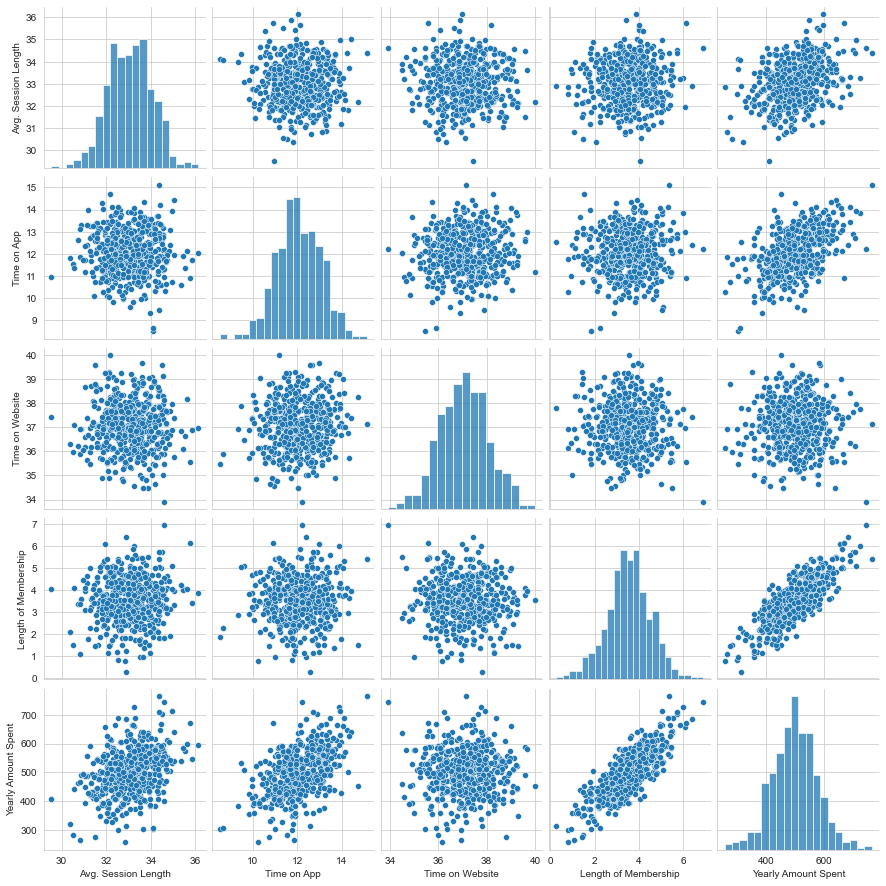

In [4]:
sns.pairplot(df_clean);


In [5]:
df_clean[['Length of Membership', 'Yearly Amount Spent']].corr('pearson')

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.809084
Yearly Amount Spent,0.809084,1.000000


In [6]:
#separando o df_clean em dados de treino e teste
from sklearn.model_selection import train_test_split

y = df_clean['Yearly Amount Spent']
x = df_clean[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#random_state: 


In [ ]:
#x_train
#y_train


---

### **TRAIN / TEST**

In [7]:
#treino
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [8]:
#coeficientes:
#dizem numericamente como cada uma das variáveis dos dados de treino impactam nas variáveis de teste

print('Coeficientes:\n', lm.coef_)

Coeficientes:
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [9]:
#teste
predictions = lm.predict(x_test)


In [10]:
#x_test
#predictions


,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


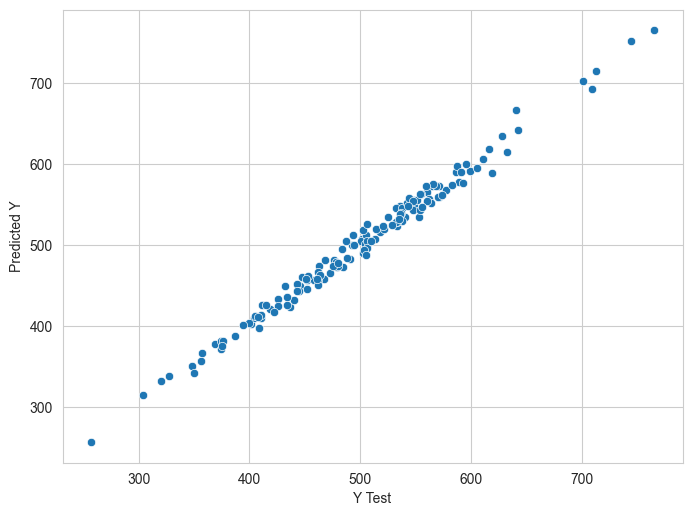

In [12]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
sns.scatterplot(x=y_test, y=predictions, ax=ax);


---

### **MODEL EVALUATION**

In [13]:
from sklearn import metrics


- *Mean Absolute Error* (média do valor absoluto dos erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [14]:
#MAE
#calcula a diferença entre os valores das predições e os valores de teste, soma e tira a média (erro)
mae = metrics.mean_absolute_error(y_test, predictions)


- *Mean Squared Error* (média dos erros ao quadrado):

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [15]:
#MSE
#diferença para o MAE: a diferença entre as predições e teste são elevados ao quadrado
#maneira de punir os erros muito discrepantes
mse = metrics.mean_squared_error(y_test, predictions)


- *Root Mean Square Error* (raiz quadrada da média dos erros ao quadrado):

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [16]:
#RMSE
#mais popular que o MAE e o MSE, por ser interpretável na unidades 'y'
rmse = np.sqrt(mse)


In [17]:
print('MAE: {:.4f}\n'.format(mae))
print('MSE: {:.4f}\n'.format(mse))
print('RMSE: {:.4f}'.format(rmse))

MAE: 7.2281

MSE: 79.8131

RMSE: 8.9338


In [18]:
df_clean['Yearly Amount Spent'].describe()


count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

- MAE e RMSE apresentam pouca diferença de valores;

- Variância entre menor valor e maior valor é de $500, face à um modelo que erra em média $9;

- Portanto, **o modelo é satisfatório**.

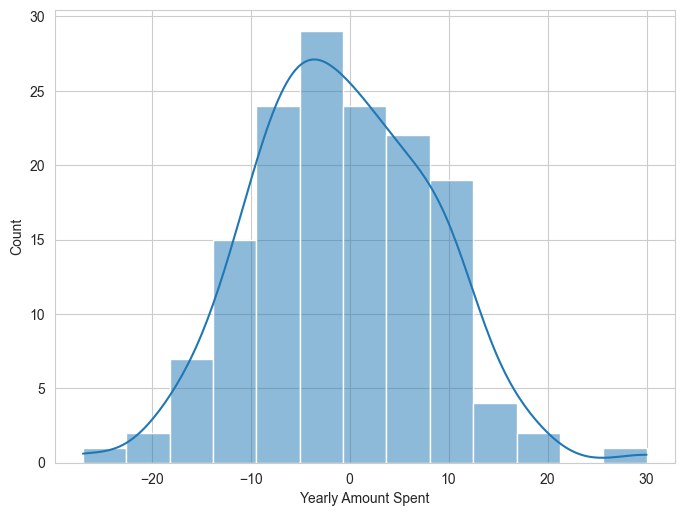

In [19]:
#análise de resíduos
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
sns.histplot((y_test - predictions), kde=True);


### **CONCLUSIONS**

_Concentrar esforços no website ou app mobile?_

**RESP:** Caso a estratégia fique engessada na escolha de somente uma destas opções, o melhor é concentrar-se no app mobile.

Porém, os dados dizem que o tempo médio de associação é também um fator de muito peso, a ponto de potencializar o resultado do investimento. (Sugestão: implantação de programa de fidelidade)


_Interpretação dos coeficientes:_

- Avg. Session Length   ->  retorno de $25.9 p/ cada 1 min gasto 
- Time on App           ->  retorno de $38.5 p/ cada 1 min gasto
- Time on Website       ->  retorno de $0.19 p/ cada 1 min gasto
- Length of Membership  ->  retorno de $61.2 p/ cada 1 ano gasto

(Na vida real, será difícl encontrar um conjunto de dados com uma correlação dessas

Valeu pelo aprendizado das técnicas de divisão do data set em dados de treino e teste, e também do fit e predict)

---

### **END**